In [1]:
plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('default')
# plt.style.use('fivethirtyeight')

### Build an algorithm to find correlations between construction age band vs current energy efficiency and current emissions (T.CO2/yr)
- Convert age band to it's maximum value in the range to have the numerical feature
- Calculate average features values of each age construction group.
- Draw points to vizually understand the dependancies.
- Calculate Pearson correlation coefficient between feature and age value. 

In [2]:
# Read clean dataset
feats = [
    'Property_UPRN',
    'Part 1 Construction Age Band',
    'Current energy efficiency rating',
    'Total current energy costs over 3 years (£)',
    'Current Emissions (T.CO2/yr)'
]
df0 = pd.read_csv('data/data_clean.csv')[feats]
print(df0.shape)
df0[:3]

(185039, 5)


,Property_UPRN,Part 1 Construction Age Band,Current energy efficiency rating,Total current energy costs over 3 years (£),Current Emissions (T.CO2/yr)
0,1001100841,"1,949.00",53.00,"3,789.00",6.20
1,1001950838,"1,929.00",66.00,"4,635.00",7.70
2,1000995515,"1,975.00",61.00,"3,570.00",4.90


In [5]:
df = df0.groupby(feats[1])[feats[2:]].mean()
df

,Current energy efficiency rating,Total current energy costs over 3 years (£),Current Emissions (T.CO2/yr)
Part 1 Construction Age Band,,,
"1,919.00",59.16,"3,745.33",5.64
"1,929.00",62.24,"3,180.04",4.81
"1,949.00",64.99,"2,860.26",4.26
"1,964.00",65.66,"2,748.28",3.97
"1,975.00",66.23,"2,858.97",4.08
"1,983.00",67.53,"2,728.01",3.86
"1,991.00",69.09,"2,515.78",3.48
"1,998.00",71.31,"2,451.01",3.47
"2,002.00",72.71,"2,384.51",3.40


In [19]:
# correlation coefficients
df.reset_index().corr().iloc[1:,0]

Current energy efficiency rating               0.93
Total current energy costs over 3 years (£)   -0.94
Current Emissions (T.CO2/yr)                  -0.95
Name: Part 1 Construction Age Band, dtype: float64

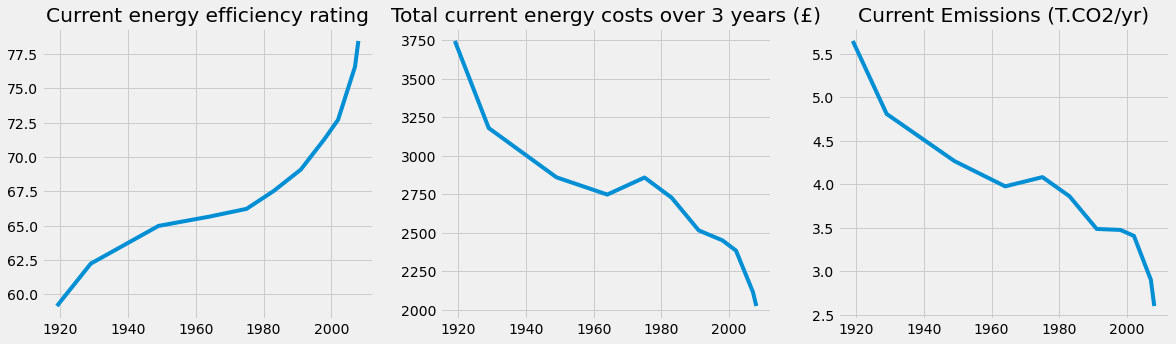

In [20]:
_, ax = plt.subplots(1,3, figsize = (18,5))
for k in [2,3,4]:
    _ = df[feats[k]].plot(title = feats[k], xlabel = '', ax = ax[k-2])